In [1]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats as stats
import pymc as pm
import random
from pymc.Matplot import plot as mcplot

 [-----------------100%-----------------] 20000 of 20000 complete in 1.7 secPlotting n_pos1
Plotting p_pos


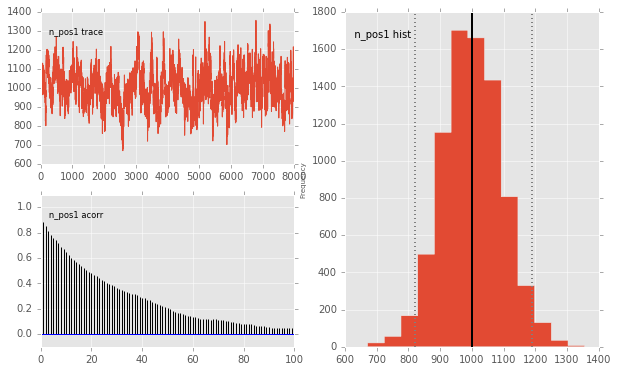

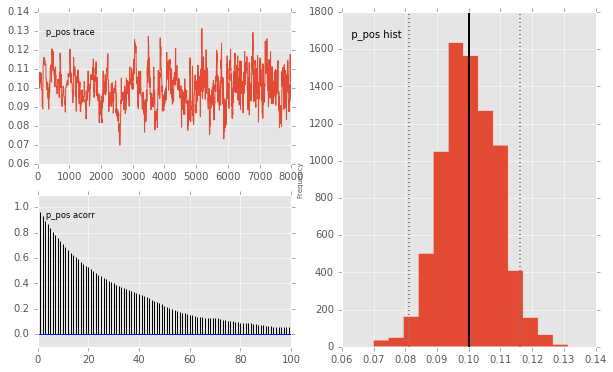

In [21]:
n0    =  1000
pos0  =   100
n1    = 10000

p_p     = pm.Uniform("p_pos", 0., 1.)

n_pos0  = pm.Binomial("n_pos0", n=n0, p=p_p, value=pos0, observed=True)
n_pos1  = pm.Binomial("n_pos1", n=n1, p=p_p)

mcmc = pm.MCMC([n_pos0, n_pos1, p_p])
mcmc.sample(20000, 4000, thin=2)

mcplot(mcmc)

In [22]:
np.percentile(mcmc.trace("n_pos1")[:], [1, 5, 50, 95, 99])

array([  778.99,   853.  ,   999.5 ,  1156.  ,  1226.  ])

In [28]:
mcmc.trace("n_pos1")[:].std(), mcmc.trace("n_pos1")[:].std() / mcmc.trace("n_pos1")[:].mean()

(93.936524548411811, 0.093770819788493068)

In [25]:
def traces_for_pos1(n0, pos0, n1, n_iter = 20000, n_burnin = 4000, thin = 2):
    
    p_p     = pm.Uniform("p_pos", 0., 1.)

    n_pos0  = pm.Binomial("n_pos0", n=n0, p=p_p, value=pos0, observed=True)
    n_pos1  = pm.Binomial("n_pos1", n=n1, p=p_p)

    mcmc = pm.MCMC([n_pos0, n_pos1, p_p])
    mcmc.sample(n_iter, n_burnin, thin=thin, progress_bar=False)

    return mcmc.trace("n_pos1")[:]

In [29]:
t = traces_for_pos1(100, 10, 1000)
np.percentile(t, [1, 5, 50, 95, 99]), np.std(t), t.std() / t.mean()

(array([  46.,   59.,  104.,  161.,  195.]),
 31.914456798359815,
 0.30009773957495051)